In [10]:
import openpyxl
from matplotlib import pyplot as plt
from collections import defaultdict
import numpy as np
battleground = openpyxl.load_workbook('BattleGround2.xlsx')

### Killed Data

In [2]:
sheet = battleground['Sheet1']
killed_by = sheet['D5':'E145']
weapon_set = set()
Killed =[]
for weapon,distance in killed_by:
    if distance.value:
        weapon_set.add(weapon.value)
        Killed.append((weapon.value, distance.value))

In [3]:
from collections import defaultdict
weapon_distance = defaultdict(list)
for weapon,distance in Killed:
    weapon_distance[weapon].append(distance)
Killed_list = {weapon:sorted(list(distance)) for weapon, distance in weapon_distance.items()}

### Kill Data

In [6]:
whole = []
for i in range(6,25):
    data = [sheet.cell(row = j, column =i).value for j in range(1,145) if sheet.cell(row=j,column = i).value]
    weapon = data[0]
    average = data[1:3]
    distance = sorted(data[3:])
    whole.append((weapon,distance))
Kill_list = dict(whole)

### 1. Kill vs. Killed

In [8]:
kill_distance = sorted([j for i in Kill_list.values() for j in i])
killed_distance = sorted([j for i in Killed_list.values() for j in i])

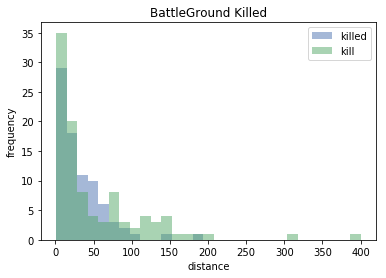

In [11]:
plt.style.use('seaborn-deep')
bins = np.linspace(1, 400, 30) #set the range you want to see. max = 400
plt.hist(killed_distance, bins = bins, alpha = .5, label = 'killed')
plt.hist(kill_distance, bins = bins, alpha = .5, label = 'kill')
plt.ylabel('frequency')
plt.xlabel('distance')
plt.title('BattleGround Killed')
plt.legend()

### 2. M416 killed vs. Vector Kill

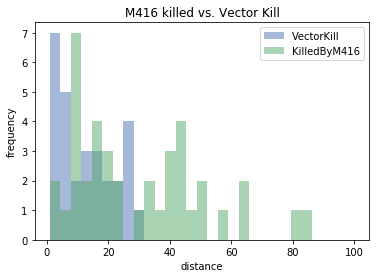

In [69]:
vector = Kill_list['Vector']
M416 = Killed_list['M416']
bins = np.linspace(1,100,30)
plt.hist(vector, bins = bins, alpha = .5, label = 'VectorKill')
plt.hist(M416, bins = bins, alpha = .5, label = 'KilledByM416')
plt.ylabel('frequency')
plt.xlabel('distance')
plt.title('M416 killed vs. Vector Kill')
plt.legend()

### 3. Killed Weapon

In [23]:
import pandas as pd
whole = [(len(Killed_list[weapon]),weapon) for weapon in Killed_list]
Dict = {}
for freq, weapon in whole:
    Dict[weapon] = freq
Dict = sorted(Dict.items(), key=lambda x: x[1], reverse = True)
df = pd.DataFrame(Dict, columns=["weapon", "frequency"]) 
df

,weapon,frequency
0,M416,40
1,QBZ,12
2,AKM,5
3,SKS,4
4,Vector,4
5,QBU,3
6,Kar98k,3
7,수류탄,3
8,M16A4,2
9,M249,2


### 4. Frequency by the weapon kinds

In [24]:
weapon_kinds = defaultdict(list)
for weapon in Kill_list:
    if weapon in {'Vector', 'UMP', 'Uzi','Skorpion'}:
        weapon_kinds['SMG'].append(len(Kill_list[weapon]))
    elif weapon in {'M24', 'Kar98k'}:
        weapon_kinds['SR'].append(len(Kill_list[weapon]))
    elif weapon in {'Mk14', 'VSS', 'QBU', 'SKS', 'SLR'}:
        weapon_kinds['DMR'].append(len(Kill_list[weapon]))
    elif weapon in {'M416', 'QBZ', 'M16A4', 'AUG', 'Mutant', 'Beryl'}:
        weapon_kinds['AR'].append(len(Kill_list[weapon]))
    else:
        weapon_kinds['ETC'].append(len(Kill_list[weapon]))
weapon_frequency = {weapon:sum(frequency) for weapon, frequency in weapon_kinds.items()}
weapon_frequency = sorted(weapon_frequency.items(), key=lambda x: x[1], reverse = True)
df = pd.DataFrame(weapon_frequency, columns=["weapon", "frequency"]) 
df

,weapon,frequency
0,SMG,40
1,AR,25
2,DMR,22
3,SR,9
4,ETC,4


### 5. Ranking Histogram

In [42]:
ranking_sheet = sheet['C5':'C145']
rank = [ranking.value for row in ranking_sheet for ranking in row if ranking.value]
rank.sort(reverse = True)

Text(0.5,1,'BattleGround Rank')

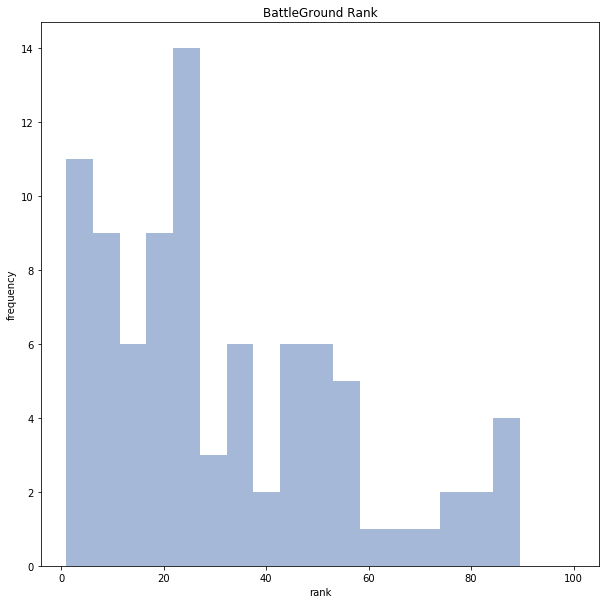

In [58]:
plt.figure(figsize = (10,10))
plt.style.use('seaborn-deep')
bins = np.linspace(1, 100, 20) #set the range you want to see. max = 80
plt.hist(rank, bins = bins, alpha = .5, label = 'rank')
plt.ylabel('frequency')
plt.xlabel('rank')
plt.title('BattleGround Rank')

### Distance by weapon_kinds

In [94]:
weapon_kinds = defaultdict(list)
for weapon in Kill_list:
    if weapon in {'Vector', 'UMP', 'Uzi','Skorpion'}:
        weapon_kinds['SMG'].append(Kill_list[weapon])
    elif weapon in {'M24', 'Kar98k'}:
        weapon_kinds['SR'].append(Kill_list[weapon])
    elif weapon in {'Mk14', 'VSS', 'QBU', 'SKS', 'SLR'}:
        weapon_kinds['DMR'].append(Kill_list[weapon])
    elif weapon in {'M416', 'QBZ', 'M16A4', 'AUG', 'Mutant', 'Beryl'}:
        weapon_kinds['AR'].append(Kill_list[weapon])
    else:
        weapon_kinds['ETC'].append(Kill_list[weapon])
weapon_frequency = {weapon:[item for sublist in frequency for item in sublist] for weapon, frequency in weapon_kinds.items()}

<Figure size 720x720 with 0 Axes>

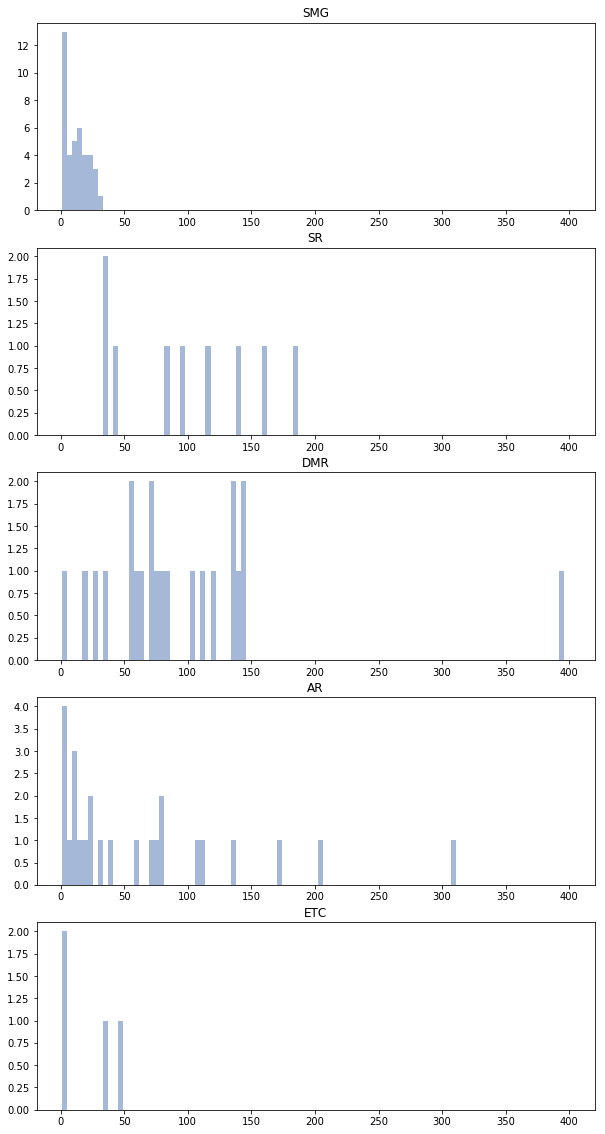

In [136]:
plt.figure(figsize = (10,10))
plt.style.use('seaborn-deep')
fig, axes = plt.subplots(5,1, figsize = (10,20))
ax = axes.ravel()

bins = np.linspace(1, 400, 100) #set the range you want to see. max = 80
for i in range(5):
    ax[i].hist(list(weapon_frequency.values())[i], bins = bins, alpha = .5, label = weapon)
    ax[i].set_title(list(weapon_frequency.keys())[i])
#     plt.ylabel('frequency')
#     plt.xlabel('distance')
#     plt.title('BattleGround weapon_kind')
#     plt.legend()